In [ ]:
!pip install -Uqq fastbook

In [37]:
import fastbook
from fastbook import *
from fastai.vision.widgets import *
from fastai.vision.all import *

In [38]:
from ddgs import DDGS

In [39]:
def search_images(keywords, max_images=200, color='color'):
    results = DDGS().images(
        query=keywords,
        max_results=max_images,
        color=color,
    )
    return L(results).itemgot('image')

In [4]:
 res = search_images('grizzly bear', max_images=1)

In [5]:
res[0]

'https://cdn.britannica.com/19/186719-050-887A6F2C/Grizzly-bear-Rocky-Mountains-Wyoming.jpg'

In [6]:
from fastdownload import download_url
dest = 'grizzley1.jpg'
download_url(res[0], dest)

Path('grizzley1.jpg')

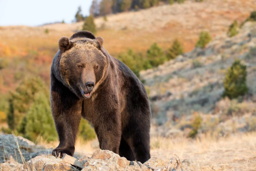

In [7]:
im = Image.open(dest)
im.to_thumb(256,256)

In [8]:
bear_types = 'grizzly','black','teddy'
path=Path('bears')

if not path.exists():
    path.mkdir()
    for o in bear_types:
        print(f' Downloading photos of {o} bear')
        dest = (path/o)
        dest.mkdir(parents=True, exist_ok=True)
        download_images(dest, urls=search_images(f'{o} bear'))

In [9]:
fns = get_image_files(path)
fns

(#262) [Path('bears/black/011bd1e1-39a3-4b28-9291-b6071ad1f332.jpg'),Path('bears/black/013245b1-19fe-4ff6-b383-475a458cd1da.jpg'),Path('bears/black/02b07cc4-b084-4d6b-bea3-74acd9f8466e.jpg'),Path('bears/black/052e3d84-af83-444a-981c-8f86e043ddf0.jpg'),Path('bears/black/06457b55-475f-4c6c-982d-ba3bc8d8b08d.jpg'),Path('bears/black/08457337-38c4-4999-b54e-23c24bff647c.jpg'),Path('bears/black/09ff8995-2381-45e1-a615-c42f71cf6e4c.jpg'),Path('bears/black/15742612-dd22-49c3-afd2-dae2c2645501.jpg'),Path('bears/black/1ab14d6b-6c2e-40b8-98a3-08635db3f766.jpg'),Path('bears/black/1bb7a1b4-1ac2-4855-84e3-70af0d57609b.jpg'),Path('bears/black/1bfe3f4b-3d90-48ec-94c3-badda4a185bb.jpg'),Path('bears/black/1cf24311-978b-4263-a8c9-aba473339840.jpg'),Path('bears/black/22faa3d2-602a-4326-b47c-ddaf24e4bc66.jpg'),Path('bears/black/236991c3-cfde-4de4-b822-8c86390e03b2.jpg'),Path('bears/black/26855a23-fab0-4802-beea-4ef9dab7002e.jpg'),Path('bears/black/290c7614-1395-458c-a39d-5e2a8e4ec221.jpg'),Path('bears/blac

In [10]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

1

In [40]:
bears = DataBlock(blocks=(ImageBlock, CategoryBlock), get_items=get_image_files, splitter=RandomSplitter(valid_pct=0.2, seed=42),
                get_y=parent_label, item_tfms=Resize(128))

In [41]:
dls = bears.dataloaders(path)

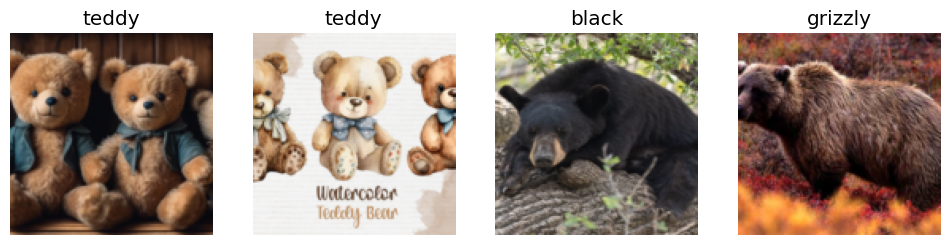

In [42]:
dls.valid.show_batch(max_n=4, nrows=1)

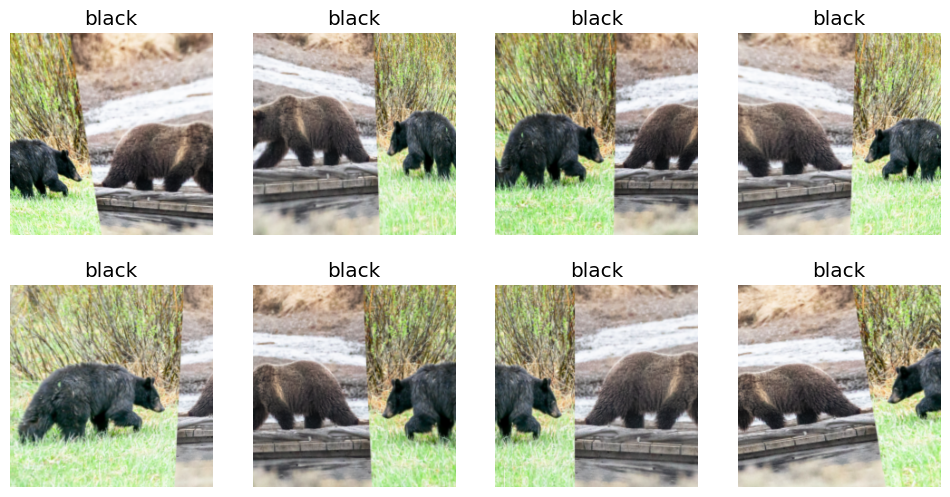

In [43]:
bears = bears.new(item_tfms=RandomResizedCrop(224, min_scale=0.5), batch_tfms=aug_transforms())
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [44]:
learn = vision_learner(dls, resnet18, metrics=error_rate)

In [45]:
learn.fine_tune(5)

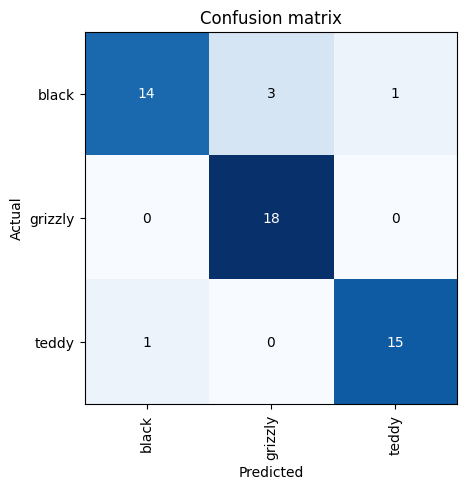

In [20]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

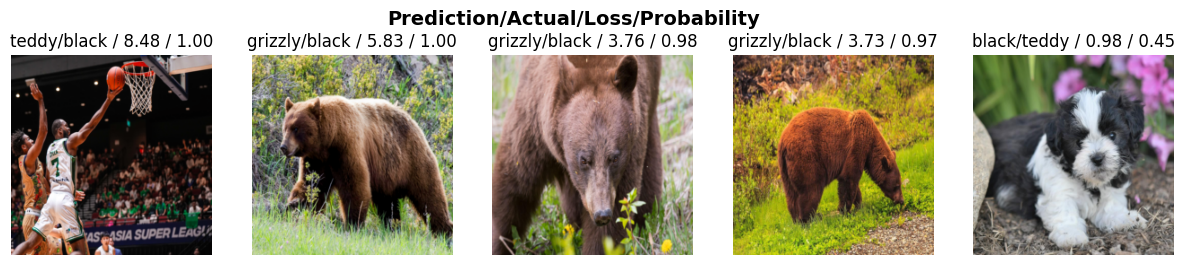

In [21]:
interp.plot_top_losses(5, nrows=1)

In [46]:
cleaner = EnhancedImageClassifierCleaner(learn)

NameError: name 'EnhancedImageClassifierCleaner' is not defined

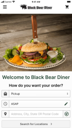

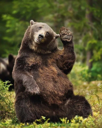

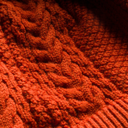

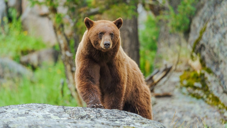

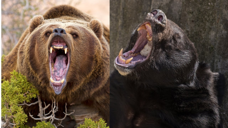

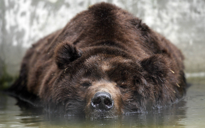

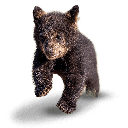

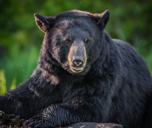

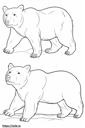

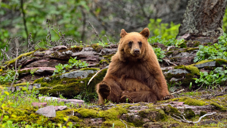

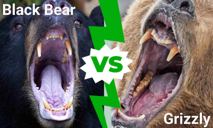

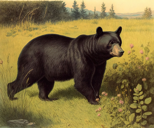

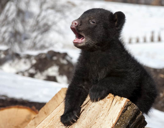

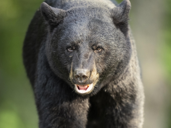

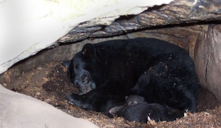

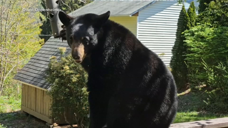

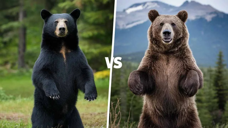

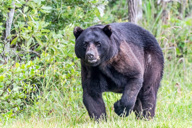

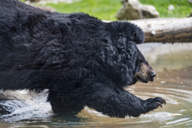

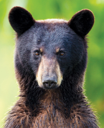

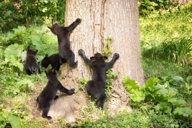

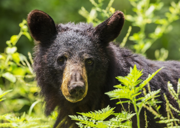

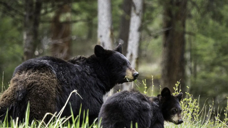

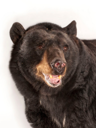

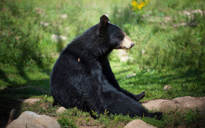

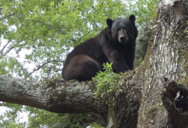

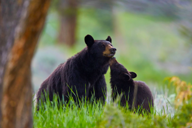

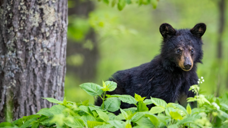

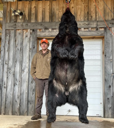

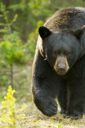

In [34]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [47]:
learn.export()

In [27]:
!jupyter --version

Selected Jupyter core packages...
IPython          : 9.4.0
ipykernel        : 6.30.1
ipywidgets       : 7.8.5
jupyter_client   : 8.6.3
jupyter_core     : 5.8.1
jupyter_server   : 2.16.0
jupyterlab       : 4.4.5
nbclient         : 0.10.2
nbconvert        : 7.16.6
nbformat         : 5.10.4
notebook         : 7.4.5
qtconsole        : not installed
traitlets        : 5.14.3


In [32]:
!pip install ipywidgets~=7.7